In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#import geopandas as gpd
#import pycountry

In [13]:
path = (r'C:\Users\ollie\OneDrive - Danmarks Tekniske Universitet\Uni\Data Visualisation\Homework 9\Inflation.csv')
df_full = pd.read_csv(path, sep=',')
pd.options.display.max_columns = 999
df_full.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,CPI,ENRG,AGRWTH,A,1972,4.910070,NaN
1,AUS,CPI,ENRG,AGRWTH,A,1973,3.762801,NaN
2,AUS,CPI,ENRG,AGRWTH,A,1974,13.173540,NaN
3,AUS,CPI,ENRG,AGRWTH,A,1975,19.422470,NaN
4,AUS,CPI,ENRG,AGRWTH,A,1976,8.833195,NaN


In [14]:
np.set_printoptions(threshold=2000)
#df_full.columns.values
#df_full['SUBJECT'].unique()

times = df_full['TIME'].unique()
#print(console.log(JSON.stringify(times)) )

In [15]:
#There are 3 types of "subject"
# - Energy
# - Food
# - Total excluding energy and food
# - Total

# Only totals
df = df_full.copy()

# Remove all rows that are not in the years 2000-2022 with monthly data
"""
times_keep = ['2000-01', '2000-02'
, '2000-03', '2000-04', '2000-05', '2000-06', '2000-07', '2000-08', '2000-09'
, '2000-10', '2000-11', '2000-12', '2001-01', '2001-02', '2001-03', '2001-04'
, '2001-05', '2001-06', '2001-07', '2001-08', '2001-09', '2001-10', '2001-11'
, '2001-12', '2002-01', '2002-02', '2002-03', '2002-04', '2002-05', '2002-06'
, '2002-07', '2002-08', '2002-09', '2002-10', '2002-11', '2002-12', '2003-01'
, '2003-02', '2003-03', '2003-04', '2003-05', '2003-06', '2003-07', '2003-08'
, '2003-09', '2003-10', '2003-11', '2003-12', '2004-01', '2004-02', '2004-03'
, '2004-04', '2004-05', '2004-06', '2004-07', '2004-08', '2004-09', '2004-10'
, '2004-11', '2004-12', '2005-01', '2005-02', '2005-03', '2005-04', '2005-05'
, '2005-06', '2005-07', '2005-08', '2005-09', '2005-10', '2005-11', '2005-12'
, '2006-01', '2006-02', '2006-03', '2006-04', '2006-05', '2006-06', '2006-07'
, '2006-08', '2006-09', '2006-10', '2006-11', '2006-12', '2007-01', '2007-02'
, '2007-03', '2007-04', '2007-05', '2007-06', '2007-07', '2007-08', '2007-09'
, '2007-10', '2007-11', '2007-12', '2008-01', '2008-02', '2008-03', '2008-04'
, '2008-05', '2008-06', '2008-07', '2008-08', '2008-09', '2008-10', '2008-11'
, '2008-12', '2009-01', '2009-02', '2009-03', '2009-04', '2009-05', '2009-06'
, '2009-07', '2009-08', '2009-09', '2009-10', '2009-11', '2009-12', '2010-01'
, '2010-02', '2010-03', '2010-04', '2010-05', '2010-06', '2010-07', '2010-08'
, '2010-09', '2010-10', '2010-11', '2010-12', '2011-01', '2011-02', '2011-03'
, '2011-04', '2011-05', '2011-06', '2011-07', '2011-08', '2011-09', '2011-10'
, '2011-11', '2011-12', '2012-01', '2012-02', '2012-03', '2012-04', '2012-05'
, '2012-06', '2012-07', '2012-08', '2012-09', '2012-10', '2012-11', '2012-12'
, '2013-01', '2013-02', '2013-03', '2013-04', '2013-05', '2013-06', '2013-07'
, '2013-08', '2013-09', '2013-10', '2013-11', '2013-12', '2014-01', '2014-02'
, '2014-03', '2014-04', '2014-05', '2014-06', '2014-07', '2014-08', '2014-09'
, '2014-10', '2014-11', '2014-12', '2015-01', '2015-02', '2015-03', '2015-04'
, '2015-05', '2015-06', '2015-07', '2015-08', '2015-09', '2015-10', '2015-11'
, '2015-12', '2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06'
, '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12', '2017-01'
, '2017-02', '2017-03', '2017-04', '2017-05', '2017-06', '2017-07', '2017-08'
, '2017-09', '2017-10', '2017-11', '2017-12', '2018-01', '2018-02', '2018-03'
, '2018-04', '2018-05', '2018-06', '2018-07', '2018-08', '2018-09', '2018-10'
, '2018-11', '2018-12', '2019-01', '2019-02', '2019-03', '2019-04', '2019-05'
, '2019-06', '2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12'
, '2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06', '2020-07'
, '2020-08', '2020-09', '2020-10', '2020-11', '2020-12', '2021-01', '2021-02'
, '2021-03', '2021-04', '2021-05', '2021-06', '2021-07', '2021-08', '2021-09'
, '2021-10', '2021-11', '2021-12', '2022-01', '2022-02', '2022-03', '2022-04'
, '2022-05', '2022-06', '2022-07', '2022-08'] """

"\ntimes_keep = ['2000-01', '2000-02'\n, '2000-03', '2000-04', '2000-05', '2000-06', '2000-07', '2000-08', '2000-09'\n, '2000-10', '2000-11', '2000-12', '2001-01', '2001-02', '2001-03', '2001-04'\n, '2001-05', '2001-06', '2001-07', '2001-08', '2001-09', '2001-10', '2001-11'\n, '2001-12', '2002-01', '2002-02', '2002-03', '2002-04', '2002-05', '2002-06'\n, '2002-07', '2002-08', '2002-09', '2002-10', '2002-11', '2002-12', '2003-01'\n, '2003-02', '2003-03', '2003-04', '2003-05', '2003-06', '2003-07', '2003-08'\n, '2003-09', '2003-10', '2003-11', '2003-12', '2004-01', '2004-02', '2004-03'\n, '2004-04', '2004-05', '2004-06', '2004-07', '2004-08', '2004-09', '2004-10'\n, '2004-11', '2004-12', '2005-01', '2005-02', '2005-03', '2005-04', '2005-05'\n, '2005-06', '2005-07', '2005-08', '2005-09', '2005-10', '2005-11', '2005-12'\n, '2006-01', '2006-02', '2006-03', '2006-04', '2006-05', '2006-06', '2006-07'\n, '2006-08', '2006-09', '2006-10', '2006-11', '2006-12', '2007-01', '2007-02'\n, '2007-03', 

In [16]:
times_keep = ['2010-01'
, '2010-02', '2010-03', '2010-04', '2010-05', '2010-06', '2010-07', '2010-08'
, '2010-09', '2010-10', '2010-11', '2010-12', '2011-01', '2011-02', '2011-03'
, '2011-04', '2011-05', '2011-06', '2011-07', '2011-08', '2011-09', '2011-10'
, '2011-11', '2011-12', '2012-01', '2012-02', '2012-03', '2012-04', '2012-05'
, '2012-06', '2012-07', '2012-08', '2012-09', '2012-10', '2012-11', '2012-12'
, '2013-01', '2013-02', '2013-03', '2013-04', '2013-05', '2013-06', '2013-07'
, '2013-08', '2013-09', '2013-10', '2013-11', '2013-12', '2014-01', '2014-02'
, '2014-03', '2014-04', '2014-05', '2014-06', '2014-07', '2014-08', '2014-09'
, '2014-10', '2014-11', '2014-12', '2015-01', '2015-02', '2015-03', '2015-04'
, '2015-05', '2015-06', '2015-07', '2015-08', '2015-09', '2015-10', '2015-11'
, '2015-12', '2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06'
, '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12', '2017-01'
, '2017-02', '2017-03', '2017-04', '2017-05', '2017-06', '2017-07', '2017-08'
, '2017-09', '2017-10', '2017-11', '2017-12', '2018-01', '2018-02', '2018-03'
, '2018-04', '2018-05', '2018-06', '2018-07', '2018-08', '2018-09', '2018-10'
, '2018-11', '2018-12', '2019-01', '2019-02', '2019-03', '2019-04', '2019-05'
, '2019-06', '2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12'
, '2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06', '2020-07'
, '2020-08', '2020-09', '2020-10', '2020-11', '2020-12', '2021-01', '2021-02'
, '2021-03', '2021-04', '2021-05', '2021-06', '2021-07', '2021-08', '2021-09'
, '2021-10', '2021-11', '2021-12', '2022-01', '2022-02', '2022-03', '2022-04'
, '2022-05', '2022-06', '2022-07', '2022-08']

In [17]:
df = df.loc[df['TIME'].isin(times_keep)]
#df['TIME'].unique()

In [18]:
# Remove all rows that are not total
print("Before:", len(df['SUBJECT']))
df.drop(df.index[df['SUBJECT'] != "TOT"], inplace = True)
print("After:", len(df['SUBJECT']))


Before: 54724
After: 14925


In [19]:
df['LOCATION'].unique()

array(['AUT', 'BEL', 'CAN', 'CZE', 'DNK', 'FIN', 'FRA', 'DEU', 'GRC',
       'HUN', 'ISL', 'IRL', 'ITA', 'JPN', 'KOR', 'LUX', 'MEX', 'NLD',
       'NOR', 'POL', 'PRT', 'SVK', 'ESP', 'SWE', 'CHE', 'TUR', 'GBR',
       'USA', 'BRA', 'CHL', 'CHN', 'EST', 'IND', 'IDN', 'ISR', 'RUS',
       'SVN', 'ZAF', 'OECD', 'OECDE', 'G-7', 'COL', 'LVA', 'SAU', 'EA19',
       'ARG', 'LTU', 'CRI', 'G-20', 'EU27_2020'], dtype=object)

In [20]:
countries_keep = ['AUS','AUT', 'BEL', 'CAN', 'CZE', 'DNK', 'FIN', 'FRA', 'DEU', 'GRC',
       'HUN', 'ISL', 'IRL', 'ITA', 'JPN', 'KOR', 'LUX', 'MEX', 'NLD',
       'NOR', 'POL', 'PRT', 'SVK', 'ESP', 'SWE', 'CHE', 'TUR', 'GBR',
       'USA', 'BRA', 'CHL', 'CHN', 'EST', 'IND', 'IDN', 'ISR', 'RUS',
       'SVN', 'ZAF', 'COL', 'LVA', 'SAU',
       'ARG', 'LTU', 'CRI']
df = df.loc[df['LOCATION'].isin(countries_keep)]

df = df.loc[df['MEASURE'] == "AGRWTH"]

df = df.drop(columns=['Flag Codes'])
#df['LOCATION'].unique()
#df.drop(df.columns[50:100], axis=1, inplace=True)
df = df.rename(columns={'Value': 'VALUE'})
#df.columns.values
df.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,VALUE
32098,AUT,CPI,TOT,AGRWTH,M,2010-01,1.219512
32099,AUT,CPI,TOT,AGRWTH,M,2010-02,1.028037
32100,AUT,CPI,TOT,AGRWTH,M,2010-03,1.958955
32101,AUT,CPI,TOT,AGRWTH,M,2010-04,2.048417
32102,AUT,CPI,TOT,AGRWTH,M,2010-05,1.857010


In [21]:
print('Number of countries: ', len(df['LOCATION'].unique()))
print('Number of months: ', len(df['TIME'].unique()))
print('Length of dataframe: ', len(df))


Number of countries:  44
Number of months:  152
Length of dataframe:  6580


In [133]:
country_dict = {'AUT': 'Austria',
                'BEL': 'Belgium',
                'CAN': 'Canada',
                'CZE': 'Czech Republic',
                'DNK': 'Denmark',
                'FIN': 'Finland',
                'FRA': 'France',
                'DEU': 'Germany',
                'GRC': 'Greece',
                'HUN': 'Hungary',
                'ISL': 'Iceland',
                'IRL': 'Ireland',
                'ITA': 'Italy',
                'JPN': 'Japan',
                'KOR': 'Korea',
                'LUX': 'Luxembourg',
                'MEX': 'Mexico',
                'NLD': 'Netherlands',
                'NOR': 'Norway',
                'POL': 'Poland',
                'PRT': 'Portugal',
                'SVK': 'Slovakia',
                'ESP': 'Spain',
                'SWE': 'Sweden',
                'CHE': 'Switzerland',
                'TUR': 'Turkey',
                'GBR': 'United Kingdom',
                'USA': 'United States of America',
                'BRA': 'Brazil',
                'CHL': 'Chile',
                'CHN': 'China',
                'EST': 'Estonia',
                'IND': 'India',
                'IDN': 'Indonesia',
                'ISR': 'Isreal',
                'RUS': 'Russia',
                'SVN': 'Slovenia',
                'ZAF': 'South Africa',
                'COL': 'Colombia',
                'LVA': 'Latvia',
                'SAU': 'Saudi Arabia',
                'ARG': 'Argentina',
                'LTU': 'Lithuania',
                'CRI': 'Costa Rica'}
df['COUNTRY'] = df['LOCATION'].map(country_dict)

In [134]:
df.to_csv('data/inflation_clean.csv', index=False)

In [122]:
import datetime
plot_countries = ['USA', 'CHN', 'DNK']
plt.figure(figsize=(14, 8), dpi=100)
#x_ticks = pd.date_range(datetime.datetime(2010,1,1), datetime.datetime(2021,1,1), freq='YS')

for country in plot_countries:
    plt.plot(df.loc[df['LOCATION'].eq(country)]['TIME'], df.loc[df['LOCATION'].eq(country)]['Value'], label=country) 
#plt.xticks(np.linspace(0,150,num=13), labels=['2010', '2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021','2022'], rotation=90, fontsize=8)
plt.xticks(['2010-01', '2011-01','2012-01', '2013-01','2014-01', '2015-01','2016-01', '2017-01','2018-01', '2019-01','2020-01', '2021-01','2022-01', '2022-08'], rotation=30)
plt.legend()
plt.show()


KeyError: 'Value'

<Figure size 1400x800 with 0 Axes>

([<matplotlib.axis.XTick at 0x22c92a29970>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

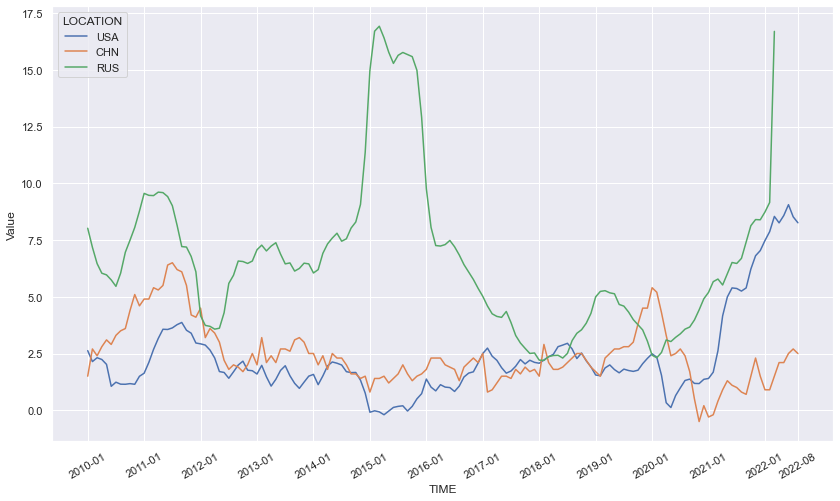

In [ ]:
import seaborn as sns
sns.set(rc={'figure.figsize':(14, 8)})

plot_countries = ['USA', 'CHN', 'RUS']
df_countries = df.loc[df['LOCATION'].isin(plot_countries)]

sns.lineplot(data=df_countries, x="TIME", y="Value", hue="LOCATION")
plt.xticks(['2010-01', '2011-01','2012-01', '2013-01','2014-01', '2015-01','2016-01', '2017-01','2018-01', '2019-01','2020-01', '2021-01','2022-01','2022-08'], rotation=30)

In [ ]:
dic = {'USA': 'United States', 'CHN': 'China', 'RUS': 'Russia'}
df_countries['LOCATION'] = df_countries['LOCATION'].replace(dic)

C:\Users\ollie\AppData\Local\Temp\ipykernel_6312\3040297072.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_countries['LOCATION'] = df_countries['LOCATION'].replace(dic)


In [ ]:
df_countries['LOCATION'] = df_countries['LOCATION'].str.replace('RUS', 'Russia', inplace=True)


TypeError: replace() got an unexpected keyword argument 'inplace'

In [ ]:
df_countries['LOCATION'].str.replace('RUS', 'Russia', inplace=True)
df_countries['LOCATION'].replace('USA', 'United States', inplace=True)
df_countries['LOCATION'].replace('CHN', 'China', inplace=True)
df_countries['LOCATION'].replace('AUS', 'Australia', inplace=True)
df_countries['LOCATION'].replace('CAN', 'Canada', inplace=True)
df_countries['LOCATION'].replace('DNK', 'Denmark', inplace=True)
df_countries['LOCATION'].replace('FRA', 'France', inplace=True)
df_countries['LOCATION'].replace('DEU', 'Germany', inplace=True)
df_countries['LOCATION'].replace('GRC', 'Greece', inplace=True)
df_countries['LOCATION'].replace('HUN', 'Hungary', inplace=True)
df_countries['LOCATION'].replace('IRL', 'Ireland', inplace=True)
df_countries['LOCATION'].replace('ITA', 'Italy', inplace=True)
df_countries['LOCATION'].replace('JPN', 'Japan', inplace=True)
df_countries['LOCATION'].replace('KOR' 'Korea', inplace=True)
df_countries['LOCATION'].replace('NLD', 'Netherlands', inplace=True)
df_countries['LOCATION'].replace('NOR', 'Norway', inplace=True)
df_countries['LOCATION'].replace('POL', 'Poland', inplace=True)
df_countries['LOCATION'].replace('PRT', 'Portugal', inplace=True)
df_countries['LOCATION'].replace('ESP', 'Spain', inplace=True)
df_countries['LOCATION'].replace('SWE', 'Sweden', inplace=True)
df_countries['LOCATION'].replace('CHE', 'Switzerland', inplace=True)
df_countries['LOCATION'].replace('GBR', 'United Kingdom', inplace=True)
df_countries['LOCATION'].replace('BRA', 'Brazil', inplace=True)
df_countries['LOCATION'].replace('CHL', 'Chile', inplace=True)
df_countries['LOCATION'].replace('EST', 'Estonia', inplace=True)
df_countries['LOCATION'].str.replace('IDN', 'Indonesia', inplace=True)



TypeError: string indices must be integers

In [ ]:
df_countries = df_countries[df_countries['LOCATION'] == 'RUS'] = 'Russia'
df_countries = df_countries[df_countries['LOCATION'] == 'AUS'] = 'Australia'
df_countries = df_countries.loc[df_countries['LOCATION'] == 'USA'] = 'United States'
df_countries = df_countries.loc[df_countries['LOCATION'] == 'CHN'] = 'China'
df_countries = df_countries.loc[df_countries['LOCATION'] == 'DNK'] = 'Denmark'
df_countries = df_countries.loc[df_countries['LOCATION'] == 'FRA'] = 'France'
df_countries = df_countries.loc[df_countries['LOCATION'] == 'DEU'] = 'Germany'
df_countries = df_countries.loc[df_countries['LOCATION'] == 'ITA'] = 'Italy'
df_countries = df_countries.loc[df_countries['LOCATION'] == 'JPN'] = 'Japan'
df_countries = df_countries.loc[df_countries['LOCATION'] == 'KOR'] = 'South Korea'
df_countries = df_countries.loc[df_countries['LOCATION'] == 'NLD'] = 'Netherlands'
df_countries = df_countries.loc[df_countries['LOCATION'] == 'NOR'] = 'Norway'
df_countries = df_countries.loc[df_countries['LOCATION'] == 'ESP'] = 'Spain'
df_countries = df_countries.loc[df_countries['LOCATION'] == 'SWE'] = 'Sweden'
df_countries = df_countries.loc[df_countries['LOCATION'] == 'CHE'] = 'Switzerland'
df_countries = df_countries.loc[df_countries['LOCATION'] == 'GBR'] = 'United Kingdom'
df_countries = df_countries.loc[df_countries['LOCATION'] == 'BRA'] = 'Brazil'
df_countries = df_countries.loc[df_countries['LOCATION'] == 'CHL'] = 'Chile'

TypeError: string indices must be integers